<a href="https://colab.research.google.com/github/inizek23/Projekt-PzAP/blob/main/PROJEKT_PzAP_Nizek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Uvod**


Cijene goriva postale su jedno od najvažnijih ekonomskih i društvenih pitanja. Hrvatska je izrazito ovisna o uvozu energenata, što znači da globalne promjene na tržištu nafte, geopolitičke krize i poremećaji u opskrbnim lancima vrlo brzo utječu na domaće cijene benzina i dizela. Budući da gorivo izravno utječe na troškove prijevoza, cijene hrane, logistiku i ukupnu inflaciju, razumijevanje čimbenika koji oblikuju cijene goriva postaje ključno za svakodnevni život građana i stabilnost gospodarstva.

Motivacija za odabir ove teme proizlazi iz činjenice da se Hrvatska posljednjih godina suočava s čestim promjenama cijena goriva, država često zamrzava cijene, a troškovima života stalno rastu. Analizom podataka o cijenama goriva u kombinaciji s ekonomskim pokazateljima poput broja stanovnika i BDP‑a po stanovniku moguće je dobiti jasniju sliku o tome kako se Hrvatska pozicionira u odnosu na druge zemlje te koliko je domaće tržište osjetljivo na globalne trendove.

Ovaj projekt koristi stvarne podatke (dataset o cijenama goriva i API podatke svjetske banke) kako bi se istražilo postoje li obrasci ili povezanosti između ekonomskih pokazatelja i kretanja cijena goriva.

#2. Opis implementacije

  Na početku izrade projekta napravio sam učitavanje svih potrebnih biblioteka, te sam započeo s učitavanjem svih potrebnih podataka. Podatke o cijenama goriva preuzeo sam s platforme Kaggle(Petrol & Gas Prices Worldwide Dataset), a podatke o ukupnom broju stanovnika i podatke o BDP-u po stanovnikudohvaćam putem World Bank Open Data API-ja u JSON formatu.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req

# Učitavanje CSV datoteke
# Dodana je postavka encoding='latin1' za ispravno učitavanje datoteke
fuel_df = pd.read_csv("Petrol Dataset June 20 2022.csv", encoding='latin1')
fuel_df['Year'] = 2022  # cijeli dataset je za 2022.

# Prikaz prvih nekoliko redaka
fuel_df.head()

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Year
0,1,United States,19687287,20.30%,934.3,5.19,1.37,289.97,2022
1,2,China,12791553,13.20%,138.7,5.42,1.43,302.87,2022
2,3,India,4443000,4.60%,51.4,5.05,1.33,281.93,2022
3,4,Japan,4012877,4.10%,481.5,4.69,1.24,262.05,2022
4,5,Russia,3631287,3.70%,383.2,3.41,0.90,190.56,2022


In [26]:
# URL za broj stanovnika
population_url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000"

# Dohvat podataka
population_data = req.get(population_url).json()
population_df = pd.DataFrame(population_data[1]) # Pretvaranje u DataFrame (drugi element liste sadrži podatke)

# Prikaz prvih redaka
population_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2024,769280888.0,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,750491370.0,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,731821393.0,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,713090928.0,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,694446100.0,,,0


In [27]:
# URL za BDP po stanovniku
gdp_url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?format=json&per_page=20000"

# Dohvat podataka
gdp_data = req.get(gdp_url).json()
gdp_df = pd.DataFrame(gdp_data[1]) # Pretvaranje u DataFrame

# Prikaz prvih redaka
gdp_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2024,1615.396356,,,1
1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,1571.449189,,,1
2,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,1679.327622,,,1
3,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,1562.416175,,,1
4,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,1351.591669,,,1


U ovom dijelu projekta uspješno su učitana tri heterogena skupa podataka: CSV skup s podacima o cijenama goriva te dva JSON skupa dohvaćena putem World Bank API-ja koji sadrže demografske i ekonomske pokazatelje država. Prikazom prvih redaka potvrđena je ispravnost dohvaćanja podataka te je stvoren temelj za daljnje pretprocesiranje i integraciju.

# **2.1. Pretprocesiranje podataka**

In [28]:
# Provjera osnovnih informacija o stupcima za podatke o gorivu
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   #                                181 non-null    int64  
 1   Country                          181 non-null    object 
 2   Daily Oil Consumption (Barrels)  181 non-null    int64  
 3   World Share                      181 non-null    object 
 4   Yearly Gallons Per Capita        181 non-null    float64
 5   Price Per Gallon (USD)           181 non-null    float64
 6   Price Per Liter (USD)            181 non-null    float64
 7   Price Per Liter (PKR)            181 non-null    float64
 8   Year                             181 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 12.9+ KB


In [29]:
fuel_df.describe(include='all')

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Year
count,181.000000,181,1.810000e+02,181,181.000000,181.000000,181.000000,181.000000,181.0
unique,NaN,181,NaN,37,NaN,NaN,NaN,NaN,NaN
top,NaN,United States,NaN,0.02%,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,23,NaN,NaN,NaN,NaN,NaN
mean,91.000000,NaN,5.335730e+05,NaN,332.006630,5.695691,1.505138,318.219227,2022.0
std,52.394338,NaN,1.858067e+06,NaN,436.558735,4.370484,1.154575,244.192081,0.0
min,1.000000,NaN,5.100000e+01,NaN,2.200000,0.080000,0.020000,4.650000,2022.0
25%,46.000000,NaN,2.003600e+04,NaN,53.900000,4.150000,1.100000,232.020000,2022.0
50%,91.000000,NaN,6.161200e+04,NaN,180.200000,5.280000,1.400000,295.040000,2022.0
75%,136.000000,NaN,2.623520e+05,NaN,424.600000,6.760000,1.790000,377.740000,2022.0


In [30]:
#Regije imaju country['id'] = ""
population_df = population_df[population_df['country'].apply(lambda x: x['id'] != "")]
gdp_df = gdp_df[gdp_df['country'].apply(lambda x: x['id'] != "")]

# OVDJE OBJASNI PROBLEM KOJI JE BIO IZNAD

In [31]:
#Izvuci naziv države iz dict objekta
population_df['country_name'] = population_df['country'].apply(lambda x: x['value'])
gdp_df['country_name'] = gdp_df['country'].apply(lambda x: x['value'])

#Preimenujem kolone
pop = population_df[['countryiso3code', 'country_name', 'date', 'value']].rename(
    columns={'countryiso3code': 'country_code', 'date': 'Year', 'value': 'population'}
)

gdp = gdp_df[['countryiso3code', 'country_name', 'date', 'value']].rename(
    columns={'countryiso3code': 'country_code', 'date': 'Year', 'value': 'gdp_per_capita'}
)

# Pretvori godinu u int
pop['Year'] = pop['Year'].astype(int)
gdp['Year'] = gdp['Year'].astype(int)

# Filtriraj samo 2022.
pop = pop[(pop['Year'] == 2022) & (pop['population'].notna())]
gdp = gdp[(gdp['Year'] == 2022) & (gdp['gdp_per_capita'].notna())]

Uz pomoć umjetne inteligencije shvatio sam da moram napraviti mapranje podataka. Nakon što sam Microsoft Copiltu poslao primjere ispisa svih svojih podataka koje dobijam ispisom head-ova svakog dataframe-a, rekao mi je da je nužno napraviti "fuzzy mapiranje" (biblioteka thefuzz). Kao razlog za to "fuzzy mapiranje" naveo je da je ono nužno pošto se nazivi država razlikuju. Razlikuju se u smislu da su Sjedeinjene Američke Države u jednim podacima nazvane "*United States*", a u drugim podacima "*United States of America*". Fuzzy prevoditelj, u ovom kodu imati će svrhu da automatski pronađe podudarnosti u nazivima država kako bi se integracija podataka izvršila što je brže moguće.

In [32]:
!pip install thefuzz[speedup] #moramo ga prvo instlairati

In [33]:
from thefuzz import process

fuel_countries = fuel_df['Country'].unique()
wb_countries = pop['country_name'].unique()

mapping = {}

for country in fuel_countries:
    match, score = process.extractOne(country, wb_countries)
    mapping[country] = match

mapping_df = pd.DataFrame(list(mapping.items()), columns=['Country', 'wb_name'])

# Spoji s country_code
mapping_df = mapping_df.merge(
    pop[['country_name', 'country_code']].drop_duplicates(),
    left_on='wb_name',
    right_on='country_name',
    how='left'
)

# Spoji mapping na fuel_df
fuel_df = fuel_df.merge(
    mapping_df[['Country', 'country_code']],
    on='Country',
    how='left'
)
#Provjeri unmatched- dobra praksa da se provjeri je li neka država ostala nemapirana nakon fuzzy mapiranja...
unmatched = fuel_df[fuel_df['country_code'].isna()][['Country']].drop_duplicates()
print("Unmatched countries:")
print(unmatched)
#ako vraća popis bez vidljive države znači da radi

Unmatched countries:
Empty DataFrame
Columns: [Country]
Index: []


In [34]:
merged = fuel_df.merge(
    pop[['country_code', 'Year', 'population']],
    on=['country_code', 'Year'],
    how='left'
)

merged = merged.merge(
    gdp[['country_code', 'Year', 'gdp_per_capita']],
    on=['country_code', 'Year'],
    how='left'
)

# Makni redove bez podataka
merged = merged.dropna(subset=['population', 'gdp_per_capita'])

print("Final merged dataset:")
print(merged.head())
print(merged.info())

Final merged dataset:
   #        Country  Daily Oil Consumption (Barrels) World Share  \
0  1  United States                         19687287      20.30%   
1  2          China                         12791553      13.20%   
2  3          India                          4443000       4.60%   
3  4          Japan                          4012877       4.10%   
4  5         Russia                          3631287       3.70%   

   Yearly Gallons Per Capita  Price Per Gallon (USD)  Price Per Liter (USD)  \
0                      934.3                    5.19                   1.37   
1                      138.7                    5.42                   1.43   
2                       51.4                    5.05                   1.33   
3                      481.5                    4.69                   1.24   
4                      383.2                    3.41                   0.90   

   Price Per Liter (PKR)  Year country_code    population  gdp_per_capita  
0                 

# NAPIŠI OPIS SVEGA ŠTO SE SADA VIDI NA OVOM DIJELU ISPISA...

In [35]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///fuel_economy.db')
merged.to_sql('fuel_economy', engine, if_exists='replace', index=False)

print("Broj zapisanih redaka u bazu:", len(merged))

Broj zapisanih redaka u bazu: 177


In [36]:
import pandas as pd

df_check = pd.read_sql("SELECT COUNT(*) FROM fuel_economy", engine)
df_check

,COUNT(*)
0,177


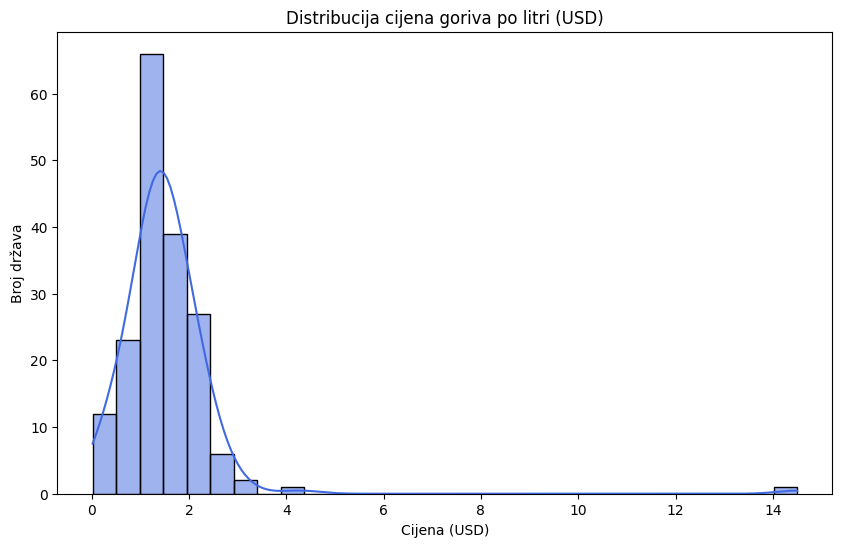

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(merged['Price Per Liter (USD)'], bins=30, kde=True, color='royalblue')
plt.title('Distribucija cijena goriva po litri (USD)')
plt.xlabel('Cijena (USD)')
plt.ylabel('Broj država')
plt.show()

/tmp/ipython-input-3712118597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Price Per Liter (USD)', y='Country', palette='Reds_r')


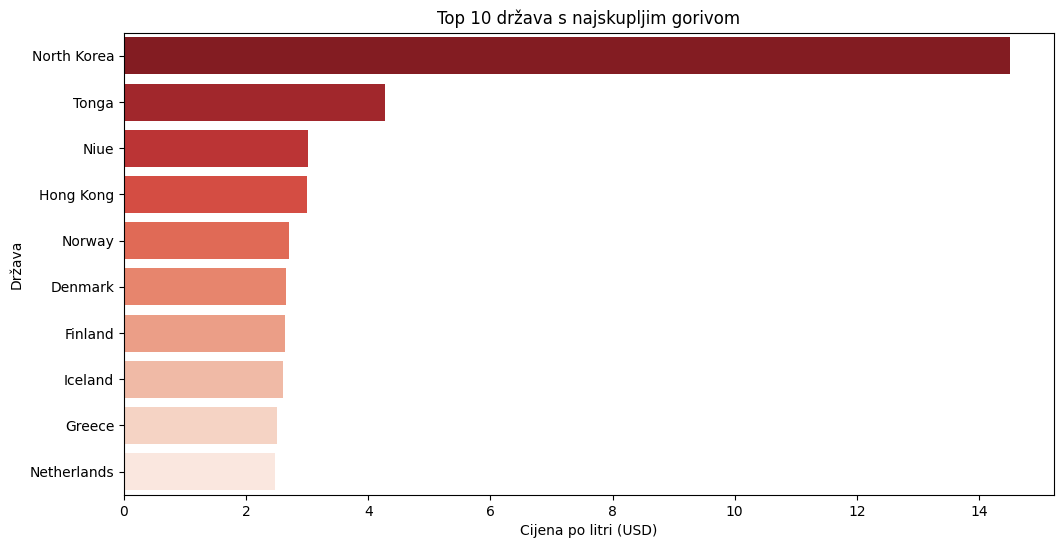

In [49]:
top10 = merged.sort_values('Price Per Gallon (USD)', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Price Per Liter (USD)', y='Country', palette='Reds_r')
plt.title('Top 10 država s najskupljim gorivom')
plt.xlabel('Cijena po litri (USD)')
plt.ylabel('Država')
plt.show()

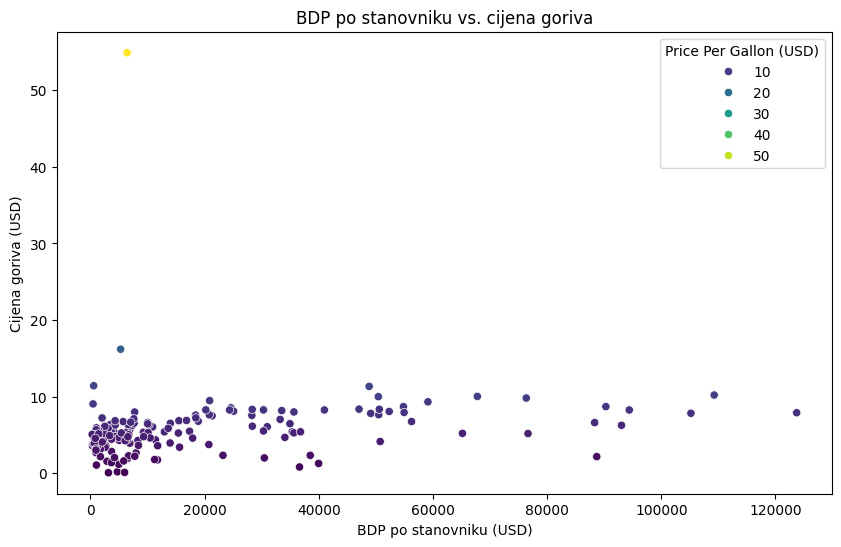

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='gdp_per_capita', y='Price Per Gallon (USD)', hue='Price Per Gallon (USD)', palette='viridis')

plt.title('BDP po stanovniku vs. cijena goriva')
plt.xlabel('BDP po stanovniku (USD)')
plt.ylabel('Cijena goriva (USD)')
plt.show()

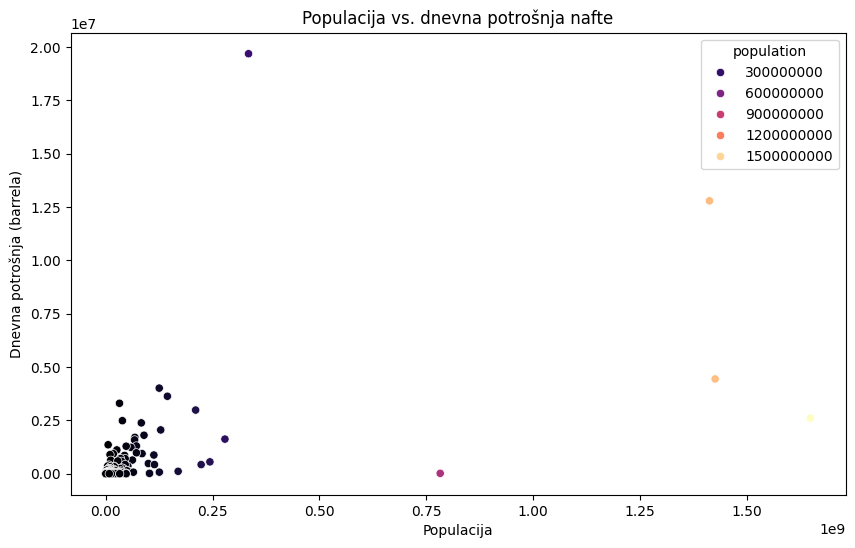

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='population', y='Daily Oil Consumption (Barrels)', hue='population', palette='magma')
plt.title('Populacija vs. dnevna potrošnja nafte')
plt.xlabel('Populacija')
plt.ylabel('Dnevna potrošnja (barrela)')
plt.show()


/tmp/ipython-input-2377983688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Country', y='Price Per Gallon (USD)', palette='Blues')


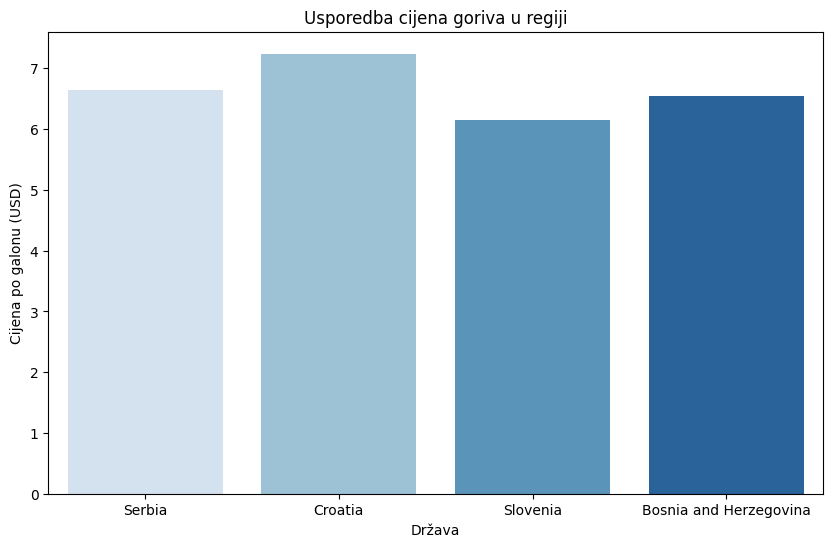

In [43]:
countries = ['Croatia', 'Slovenia', 'Serbia', 'Bosnia and Herzegovina']
subset = merged[merged['Country'].isin(countries)]

plt.figure(figsize=(10,6))
sns.barplot(data=subset, x='Country', y='Price Per Gallon (USD)', palette='Blues')
plt.title('Usporedba cijena goriva u regiji')
plt.xlabel('Država')
plt.ylabel('Cijena po galonu (USD)')

plt.show()